In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
%matplotlib inline

Using TensorFlow backend.


# 1. Cargar modelo

In [2]:
model = ResNet50()

102678528/102853048 [============================>.] - ETA: 0s

In [3]:
# Vemos el tamaño del input
model.input

<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>

# 2. Cargar ejemplo

(880, 587)


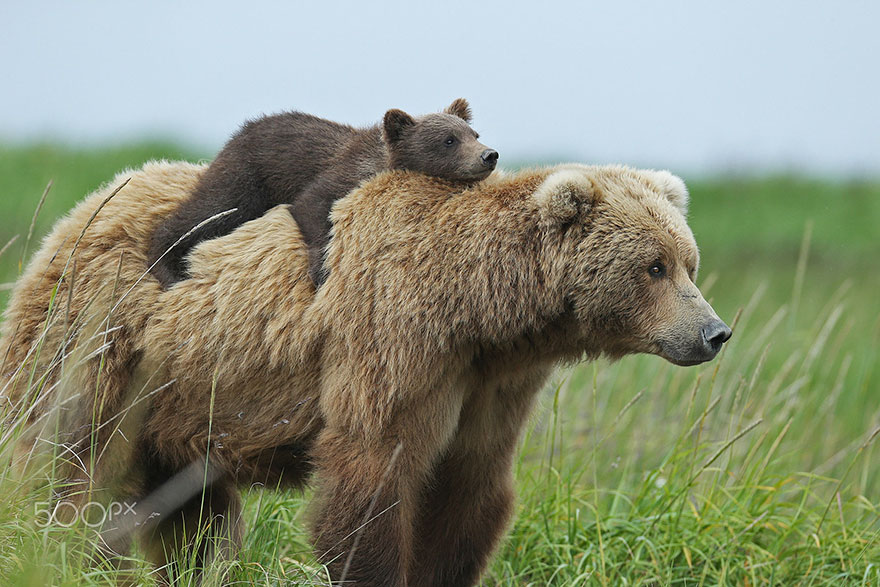

In [4]:
path = 'imgs/bear.jpg'
img = Image.open(path)
print(img.size)
img

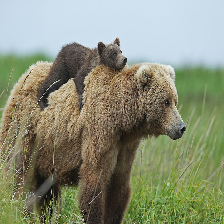

In [5]:
# Ajustamos la imagen al tamaño de model.input
img_resized = img.resize((224, 224))
img_resized

# 3. Usar el modelo

In [6]:
# Llevamos la imagen a un array de tipo float32
x = np.asarray(img_resized, np.float32)
x.shape

(224, 224, 3)

In [7]:
# Ajustamos las dimensiones
x = x[None]
x.shape

(1, 224, 224, 3)

In [11]:
# Utilizamos el preprocesing del modelo
x = preprocess_input(x)

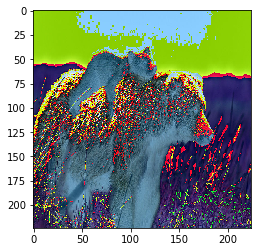

In [17]:
plt.imshow(x[0])

In [18]:
# Obtenemos los resultados del modelo (un array con los puntajes de 1000 clases)
y = model.predict(x)
y.shape, y[0,:10]

((1, 1000), array([  7.88595589e-09,   3.10610737e-09,   2.81995707e-08,
          6.63070532e-09,   6.70047706e-09,   3.33236230e-08,
          8.45713632e-09,   7.23701916e-08,   3.70872968e-08,
          1.68271924e-06], dtype=float32))

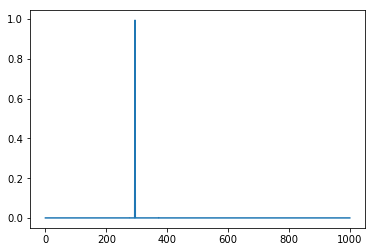

In [19]:
# Visualizamos las predicciones
plt.plot(y[0]);

In [20]:
# Usamos la funcion decode_predictions para obtener el nombre de las 5 clases mas probables
preds = decode_predictions(y)
preds

24576/35363 [===================>..........] - ETA: 0s

[[('n02132136', 'brown_bear', 0.99445528),
  ('n02486410', 'baboon', 0.0011530037),
  ('n02117135', 'hyena', 0.00081755989),
  ('n02133161', 'American_black_bear', 0.00069539953),
  ('n02410509', 'bison', 0.00045081275)]]

# 4. Resumiendo en una funcion

In [26]:
def get_class(path):
    # TODO: Obtener las prediciones del modelo
    # usar plt.imshow(), para mostrar la imagen
    # (tip: plt.axis('off') remueve los ejes)
    img = Image.open(path)
    img_resized = img.resize((224, 224))
    x = np.asarray(img_resized, np.float32)
    x = x[None]
    x = preprocess_input(x)    
    y = model.predict(x)
    preds = decode_predictions(y)
    plt.imshow(img)
    plt.axis('off')
    
    return preds

[[('n02129604', 'tiger', 0.84580642),
  ('n02123159', 'tiger_cat', 0.15358073),
  ('n02391049', 'zebra', 0.00024426833),
  ('n02128925', 'jaguar', 8.2775114e-05),
  ('n02127052', 'lynx', 7.5538926e-05)]]

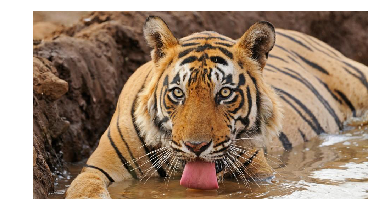

In [27]:
get_class('imgs/tiger.jpg')

[[('n02107908', 'Appenzeller', 0.88996452),
  ('n02107574', 'Greater_Swiss_Mountain_dog', 0.064545281),
  ('n02108000', 'EntleBucher', 0.013698087),
  ('n02107683', 'Bernese_mountain_dog', 0.010620665),
  ('n02110806', 'basenji', 0.0095574176)]]

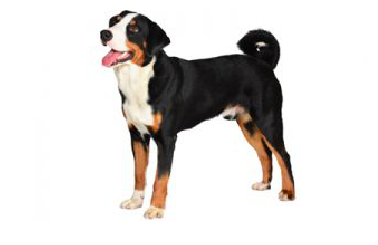

In [28]:
get_class('imgs/dog1.jpg')

[[('n02088364', 'beagle', 0.77281982),
  ('n02089867', 'Walker_hound', 0.17623769),
  ('n02089973', 'English_foxhound', 0.029853947),
  ('n02088238', 'basset', 0.019162729),
  ('n02088632', 'bluetick', 0.0010491236)]]

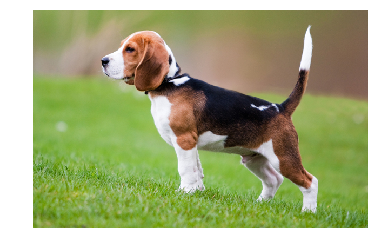

In [29]:
get_class('imgs/dog2.jpg')

[[('n04536866', 'violin', 0.72658384),
  ('n02992211', 'cello', 0.27017641),
  ('n02676566', 'acoustic_guitar', 0.0004795643),
  ('n03527444', 'holster', 0.00035759306),
  ('n03272010', 'electric_guitar', 0.00035428294)]]

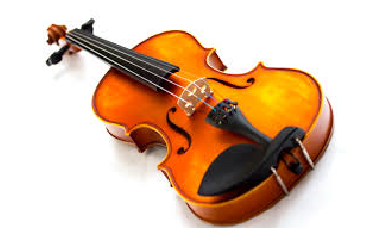

In [30]:
get_class('imgs/violin.jpeg')